**RUN ALL THE CELLS AND DON'T EDIT ANY CELL**

**CODE IN THE MENTIONED CELLS ONLY**

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Import Necessary Files

In [32]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import numpy as np


Add ```/path/to/your/folder``` to load the images

In [6]:
cartoon = cv2.imread("./drive/MyDrive/images_opencv/cartoon.bmp")
cartoon_y = cv2.imread("./drive/MyDrive/images_opencv/cartoon_y.jpg")
girl = cv2.imread("./drive/MyDrive/images_opencv/girl.png") #grayscale image
girl_y = cv2.imread("./drive/MyDrive/images_opencv/girl_y.jpg")
fingerprint = cv2.imread("./drive/MyDrive/images_opencv/fingerprint.jpg")
fingerprint_y = cv2.imread("./drive/MyDrive/images_opencv/fingerprint_y.jpg")

## Raw and Final Image
You need to process the raw images: ```cartoon, girl, fingerprint``` to get the processed images: ```cartoon_y, girl_y, fingerprint_y```

Your processed image need not be 100% alike given processed image. They are given to give you an idea of what to process in the raw images.

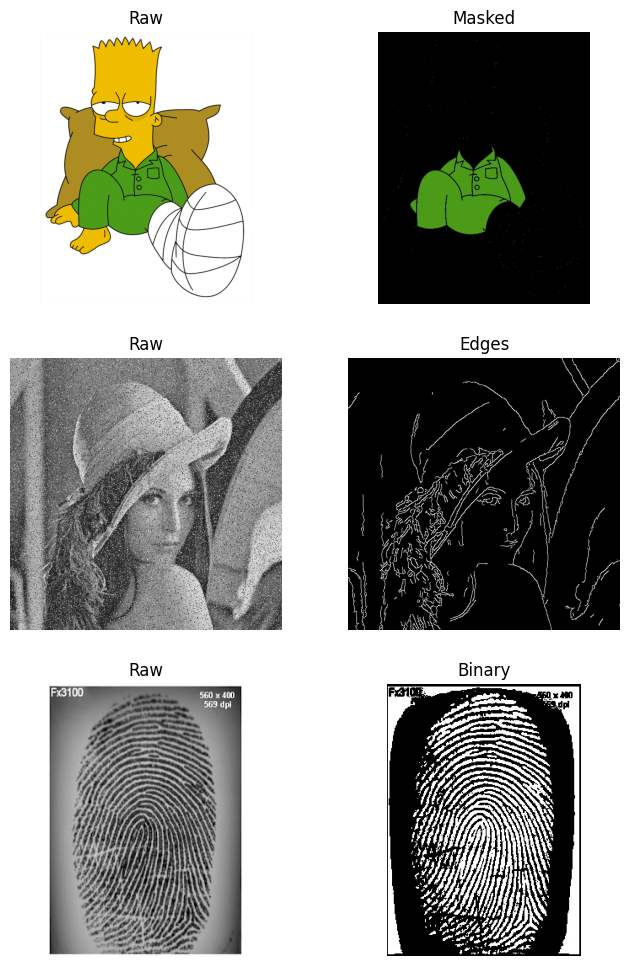

In [7]:
fig, axs = plt.subplots(3,2,figsize=(8,12))
axs[0,0].imshow(cv2.cvtColor(cartoon,cv2.COLOR_BGR2RGB))
axs[0,1].imshow(cartoon_y)
axs[0,0].axis("off")
axs[0,1].axis("off")
axs[0,0].set_title("Raw")
axs[0,1].set_title("Masked")
axs[1,0].imshow(girl)
axs[1,1].imshow(girl_y)
axs[1,0].axis("off")
axs[1,1].axis("off")
axs[1,0].set_title("Raw")
axs[1,1].set_title("Edges")
axs[2,0].imshow(cv2.cvtColor(fingerprint,cv2.COLOR_BGR2RGB))
axs[2,1].imshow(fingerprint_y)
axs[2,0].axis("off")
axs[2,1].axis("off")
axs[2,0].set_title("Raw")
axs[2,1].set_title("Binary")
plt.show()

## Code in the following 3 cells only

### Cartoon
For the bart image, you need to mask the dress. Write all your code in the cell below and the final image should be stored in ```cartoon_y_mentee``` variable only or it'll show error later.

In [117]:
#START CODE HERE (Do all your processing here)

low_green = np.array([0, 82, 0], dtype=np.uint8)
upper_green = np.array([82,255,82], dtype=np.uint8)
mask= cv2.inRange(cartoon,low_green,upper_green)
cartoon_y_mentee = cv2.bitwise_and(cartoon,cartoon, mask = mask)
cartoon_y_mentee = cv2.cvtColor(cartoon_y_mentee,cv2.COLOR_BGR2RGB)

#END CODE HERE (the final processed image should be cartoon_y_mentee)

### Girl
For the girl image, you need to detect the edges. Write all your code in the cell below and the final image should be stored in ```girl_y_mentee``` variable only or it'll show error later.

In [213]:
#START CODE HERE (Do all your processing here)
girl_y_mentee =cv2.cvtColor(girl,cv2.COLOR_BGR2GRAY)
# ret,girl_y_mentee = cv2.threshold(girl_y_mentee,127,255,cv2.THRESH_BINARY)
# girl_blur = cv2.GaussianBlur(girl_y_mentee, (5, 5), 0)
# girl_y_mentee = cv2.Canny(girl_y_mentee,270,720)
sobel_x =cv2.Sobel(girl,-1,1,0)
sobel_y =cv2.Sobel(girl,-1,0,1)
girl_y_mentee = cv2.addWeighted(sobel_x,0.85,sobel_y,0.15,0)
#END CODE HERE (the final processed image should be girl_y_mentee)

In [11]:
#START CODE HERE (Do all your processing here)

fingerprint_y_mentee = cv2.cvtColor(fingerprint,cv2.COLOR_BGR2GRAY)
ret, fingerprint_y_mentee = cv2.threshold(fingerprint_y_mentee, 105, 255, cv2.THRESH_BINARY_INV)

 #(in Binary format only i.e. pixel intensity = 0 or 255)

#END CODE HERE (the final processed image should be fingerprint_y_mentee)

## Comparison

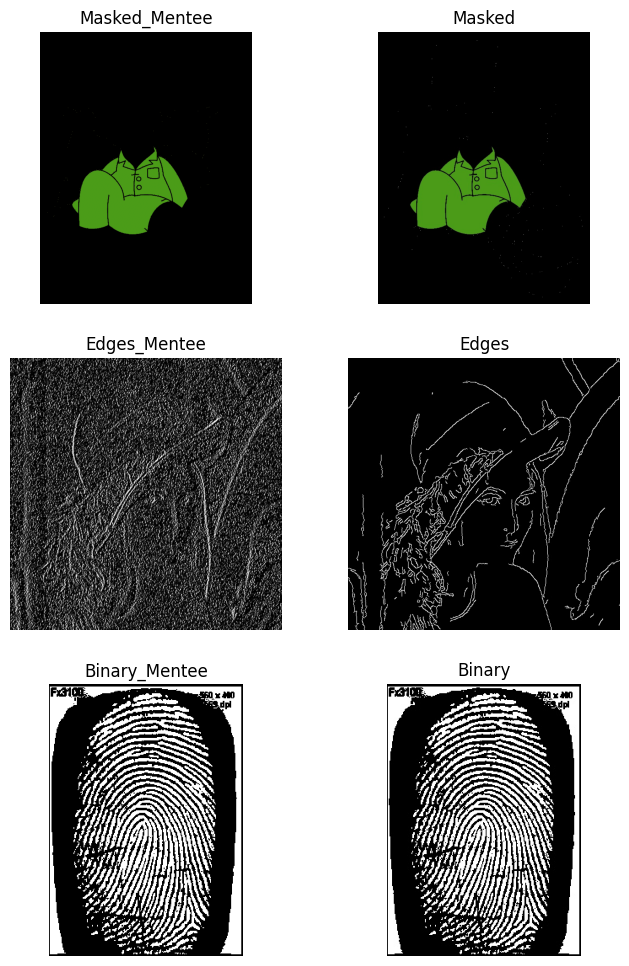

In [214]:
fig, axs1 = plt.subplots(3,2,figsize=(8,12))
axs1[0,0].imshow(cartoon_y_mentee)
axs1[0,1].imshow(cartoon_y)
axs1[0,0].axis("off")
axs1[0,1].axis("off")
axs1[0,0].set_title("Masked_Mentee")
axs1[0,1].set_title("Masked")
axs1[1,0].imshow(girl_y_mentee,cmap="gray")
axs1[1,1].imshow(girl_y)
axs1[1,0].axis("off")
axs1[1,1].axis("off")
axs1[1,0].set_title("Edges_Mentee")
axs1[1,1].set_title("Edges")
axs1[2,0].imshow(fingerprint_y_mentee,cmap="gray")
axs1[2,1].imshow(fingerprint_y)
axs1[2,0].axis("off")
axs1[2,1].axis("off")
axs1[2,0].set_title("Binary_Mentee")
axs1[2,1].set_title("Binary")
plt.show()